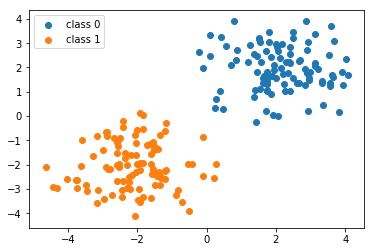

In [38]:
import torch
from torch.autograd import Variable

N = torch.ones(100, 2) #训练样本数
x0 = Variable(torch.normal(2*N, 1))
y0 = Variable(torch.zeros(100, 1))
x1 = Variable(torch.normal(-2*N, 1))
y1 = Variable(torch.ones(100, 1))
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)

#作出散点图
fig, ax = plt.subplots()
labels = ['class 0','class 1']
ax.scatter(x.numpy()[0:len(x0),0], x.numpy()[0:len(x0),1], label=labels[0])
ax.scatter(x.numpy()[len(x0):len(x),0], x.numpy()[len(x0):len(x),1], label=labels[1])
ax.legend()

In [39]:
#初始化w和b
w = Variable(torch.zeros(2, 1), requires_grad = True)
b = Variable(torch.zeros(1, 1), requires_grad = True)
EPOCHS = 200
likelihood = []
lr = 0.01
for epoch in range(EPOCHS):
    A = 1/(1+torch.exp(-(x.mm(w)+b))) #Logistic函数
    J =  -torch.mean(y*torch.log(A) + (1-y)*torch.log(1-A)) #对数似然函数
    likelihood.append(-J.data.numpy().item())
    J.backward() #求似然函数对w和b的梯度
    w.data = w.data - lr * w.grad.data #更新w
    w.grad.data.zero_()
    b.data = b.data - lr * b.grad.data #更新b
    b.grad.data.zero_()

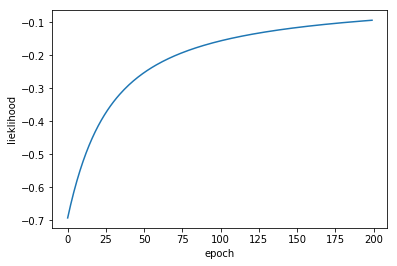

In [40]:
import matplotlib.pyplot as plt
plt.plot(likelihood)
plt.ylabel("lieklihood")
plt.xlabel("epoch")
plt.show()

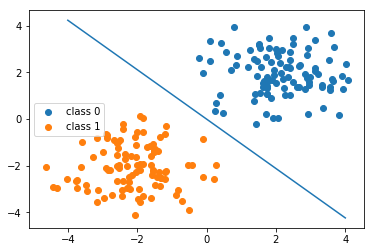

In [41]:
xa = list(range(-4, 5))
xb = []
for item in xa:
    xb.append(-(b.data + item*w[0])/w[1])
fig, ax = plt.subplots()
labels = ['class 0','class 1']
ax.scatter(x.numpy()[0:len(x0),0], x.numpy()[0:len(x0),1], label=labels[0])
ax.scatter(x.numpy()[len(x0):len(x),0], x.numpy()[len(x0):len(x),1], label=labels[1])
ax.legend()
plt.plot(xa, xb)
plt.show()

In [42]:
from torch import nn
class Logistic(nn.Module):
    def __init__(self):
        super(Logistic, self).__init__()
        self.linear = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        y_pred = self.linear(x)
        y_pred = self.sigmoid(y_pred)
        return y_pred
model = Logistic()

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)
EPOCHS = 1000
costs = []
for epoch in range(EPOCHS):
    x = Variable(x)
    y = Variable(y)
    out = model(x)
    loss = criterion(out, y)
    costs.append(loss.data.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

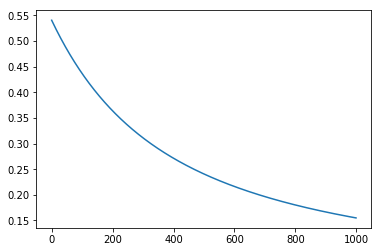

In [43]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.show(range(len(costs)), costs)

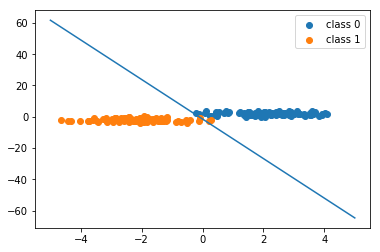

In [45]:
w1, w2 = model.linear.weight[0]
b = model.linear.bias.item()
plot_x = range(-5, 6, 1)
plot_y = [-(w1*item+b)/w2 for item in plot_x]

fig, ax = plt.subplots()
labels = ['class 0','class 1']
ax.scatter(x.numpy()[0:len(x0),0], x.numpy()[0:len(x0),1], label=labels[0])
ax.scatter(x.numpy()[len(x0):len(x),0], x.numpy()[len(x0):len(x),1], label=labels[1])
ax.legend()
ax.plot(plot_x, plot_y)